# Overview

Kernel methods owe their name from the use of kernel functions used to measure similarity between two vectors.

Kernel methods owe their name to the use of kernel functions, which enable them to operate in a high-dimensional, implicit feature space without ever computing the coordinates of the data in that space, but rather by simply computing the inner products between the images of all pairs of data in the feature space. This implicit calculation of the data into the higher dimensional space without actually calculating the projection is referred to as the **kernel trick**. 

Further kernel functions provide a method to measure the similarity between vectors (data points). For example the value for the a kernel function $\space \kappa(\textbf{x}_i, \textbf{x}_j) $ is relatively high when data is similar and relatively low when dissimilar.

### Instance based learners
Kernel methods are included in a subset of machine learning algorithms termed *instance based learners*. Opposed to other *parameteric methods* where a set of parameters are learnt to map inputs to some output space,  $\space f_\theta(x): x \rightarrow y $ . Instance based learning instead learns weights $ w_i $ for each training example $ \space (\textbf{x}_i, y_i) $ recalling these weights at test/prediction time to quantify similarity between training inputs $\textbf{x}_i$ and test/prediction point $\textbf{x'}$ predicting output for  $ \space \textbf{x'}$. Predictions for $ \hat y$ are calculated by use of the four inputs, 

1. Training input data (indexed by i) 
2. Training outputs (indexed by i) 
3. Training weights (indexed by i) 
4. Test/prediciton vector 

A binary classifier is a concrete example of an *instance based learner* which can be calculaed using the following: 

$$ \hat y = sgn \sum^n_{i=1}y_i w_i k(\textbf{x}_i, x') $$

Where parameters are defined by: 

$ k(\textbf{x}_i, x') $ is the kernel similarity that measures the similarity between training data point i and test/prediction point. 

$ y_i $ is a class label. Either {0,1}. 

$ w_i $ is a learnt weight vector. 

$ sgn $ a function to determine class ie if > 0 positive class else negative class.

$ \hat y $ is the predicted class


In [2]:
# Import needed libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

plt.rcParams["figure.figsize"] = (9, 9)

## Kernel functions

As previously mentioned, kernels provide a method to project data into a higher dimensional space where the data can then be linearly seperate though actually applying the projections of the data is not needed. Data is implicitly projected into a the higher dimensional space using using inner products. An example as such is the previously seen squared kernel. To illustrate that the data could be seperated linearly, the projection $ \space (x_1^2,x_2^2,\sqrt2x_1x_2) $ was applied to each data point sending its dimension to $ \space \mathbb{R}^3 $.

With the data projected into a space that is linearly seperable, the inner products of data points can be taken to measure the similarity between data points yielding the following calculation: 
    
$$ \space \kappa(\textbf{x}_i, \textbf{x}_j) =  <(x_{1i}^2,x_{1j}^2,\sqrt2x_{1i}x_{1j}), (x_{2i}^2,x_{2j}^2,\sqrt2x_{2i}x_{2j})> $$

Solving for this dot product: 

$$ x_{1i}^2 x_{2i}^2  + x_{1j}^2 x_{2j}^2 + 2 x_{1i}x_{1j} x_{2i}x_{2j} $$

The above has outlined the explicit process of: 

    1. Project each data point to the higher dimensional space 
    2. Calculate the dot product between respective data points (scalar)
    
Mapping each data point to a higher dimensional space to simple reduce it back to a scalar seems somewhat ineffecient. This issue is solved by kernel methods where mapping is achieved explicitly. Illustrating how this simplification can be achieved without explicitly calculating the projected the data into a higher dimensional space: 
    
\begin{align}
 \space \kappa(\textbf{x}_i, \textbf{x}_j) =&  <\textbf{x}_1, \textbf{x}_2>^2 \\  
             =& <x_{1i} x_{2i} + x_{1j} x_{2j}>^2 \\ 
             =& \space x_{1i}^2 x_{2i}^2 + x_{1j}^2 x_{2j}^2 + 2 x_{1i}x_{1j} x_{2i}x_{2j} \\
\end{align}

NOTE: implicitly calculating the kernel gives yields the same answer as first explicitly calculating the projected data points and then finding the dot product.

In [44]:
# Create data 
b = np.array([3,5])
a = np.array([8,9])

NUM_DATA_POINTS = 500
DATA_DIMENSIONS = 2

THRESHOLD = 2.5
ERROR = 0.4
# Uniform rand num gen bounds
DATA_BOUNDS = 6

print(np.dot(a,b) ** 2)

4761


Updated sim_data for class condition condition


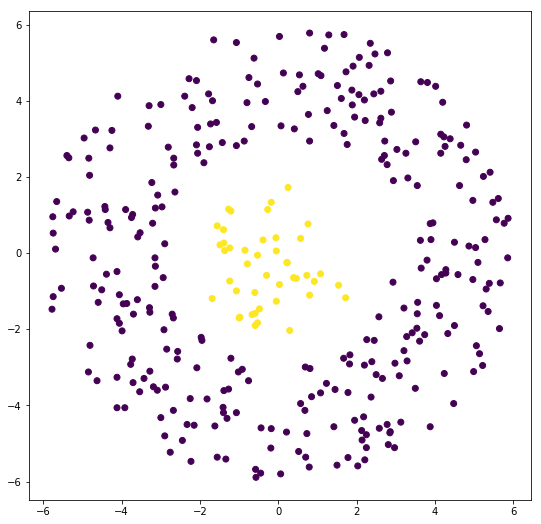

In [45]:
# generate random data points in 2d space x_1 and x_2 between -6 and 6
sim_data = np.round(np.random.uniform(-DATA_BOUNDS,DATA_BOUNDS, size = (NUM_DATA_POINTS, DATA_DIMENSIONS)),2)

sim_data = np.insert(sim_data,2,np.zeros(NUM_DATA_POINTS, dtype= bool), axis = 1)


# calculate a class for each of these points using logic x^2 + y^2 < 2 = 0 else 1
#indices = [i for (i,v) in enumerate(a[1]) if v==0]
#a = np.delete(a, indices, 1)
for data_pnt in sim_data: 
    if (data_pnt[0]**2) + (data_pnt[1]**2) > (THRESHOLD) ** 2: 
        data_pnt[2] = 0
    else: 
        data_pnt[2] = 1

sum_sq_abv_thrshld_abv = []
for i,data_pnt in enumerate(sim_data): 
        if (data_pnt[0]**2) + (data_pnt[1]**2) > (6) ** 2: 
            sum_sq_abv_thrshld_abv.append(i)


sim_data = np.delete(sim_data, sum_sq_abv_thrshld_abv, 0)
            
sum_sq_abv_thrshld_band = []
for i,data_pnt in enumerate(sim_data): 
        if (data_pnt[0]**2) + (data_pnt[1]**2) < (THRESHOLD + ERROR) ** 2 and (data_pnt[0]**2) + (data_pnt[1]**2) > (THRESHOLD - ERROR) ** 2: 
            sum_sq_abv_thrshld_band.append(i)
            
print("Updated sim_data for class condition condition")
sim_data = np.delete(sim_data, sum_sq_abv_thrshld_band, 0)
    
plt.scatter(sim_data[:,0],sim_data[:,1],c=sim_data[:,2])
plt.show()
# calculate projection into 3d space to illustrate the linear separtion using manual projection method





### Project data points into 3D space
An illustration kernels, using the function $ \space \phi(x) \rightarrow (x_1^2,x_2^2,\sqrt2x_1x_2)$ such that $ \phi(x) : \mathbb{R}^2 \rightarrow \mathbb{R}^3 $ the data is projected into a 3-dimensional space.

In [59]:
# Use function to project data into 3-dimensional space, x,y,z
x_proj_data = 3 * sim_data[:,0] ** 2
sim_data = np.insert(sim_data, 3, x_proj_data, axis = 1)

y_proj_data = 3 * sim_data[:,1] ** 2
sim_data = np.insert(sim_data, 4, y_proj_data, axis = 1)

# z_proj_data = np.absolute(np.sqrt(2) * sim_data[:,0] * sim_data[:,1])
z_proj_data = sim_data[:,0]**2 +  (sim_data[:,1])**2
sim_data = np.insert(sim_data, 5, z_proj_data, axis = 1)


Applying the $ \space \phi(x) \rightarrow (x_1^2,x_2^2,\sqrt2x_1x_2)$ projection to the data points produces the following plot. Of interest is that the two classes under this projection has now clearly become linearly seperable.
As a side note: Support Vector Machine, SVMs use this trick of projecting data into a higher dimensional space in which the data becomes linearly seperable.

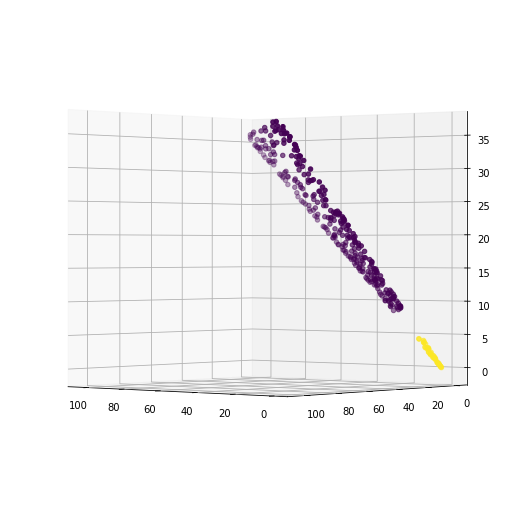

In [60]:
# Create figure 
fig = plt.figure()
ax = plt.axes(projection='3d')

# Draw scatter plot
ax.scatter(sim_data[:,3], sim_data[:,4], sim_data[:,5], c=sim_data[:,2])

# Create points of the plane
#x_s = np.linspace(0)

# Rotate plot
ax.view_init(elev = 0, azim = 130)


